# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [23]:
df = pd.read_csv('C:\\Users\\AndyLiu\\Downloads\\Unit02\\data\\grades.csv')  #, encoding = 'utf-8-sig')
df

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [4]:
df.head(5)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [5]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [6]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

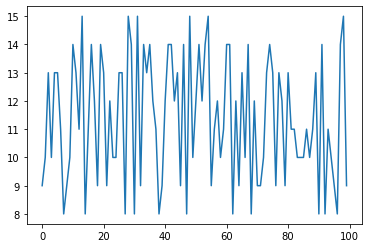

In [7]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

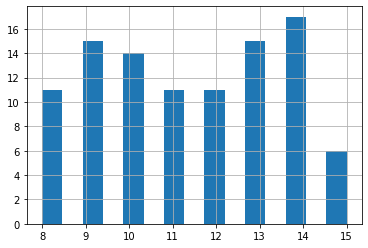

In [9]:
df.國文.hist(bins = 15)

## 3 一些基本的資料分析

算平均。

In [11]:
df['國文'].mean()

11.39

算標準差。

In [12]:
df['國文'].std()

2.1968526614594834

不如就該算的都幫我們算算...

In [16]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [17]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [18]:
df['國文'].corr(df['數學'])

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [24]:
df['總級分'] = df.sum(axis = 1)
df['加權'] = df['國文'] + df['英文'] + df['數學'] * 2
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45
98,李明威,15,9,8,9,15,56,40


### 【技巧】

有計算的當然也可以的。

## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [26]:
df.sort_values(by = '總級分', ascending = False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
64,俞志峰,9,14,13,14,15,65,49
83,李士賢,10,14,15,13,13,65,54
87,趙偉希,10,13,14,13,15,65,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [27]:
df.sort_values(by = ['加權', '總級分'], ascending = False).head(20)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54
44,童心怡,13,13,14,8,13,61,54
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
4,崔靜成,13,12,14,12,13,64,53
67,林哲法,14,9,15,10,14,62,53


### 【重點】重設 index

In [30]:
df.sort_values(by = ['加權', '總級分'], ascending = False).head(20).reset_index(drop = True).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,吳志遠,13,15,15,8,8,59,58
1,胡淳茜,12,15,14,13,11,65,55
2,詹威德,12,13,15,10,14,64,55
3,蔡亦瑄,13,13,14,13,12,65,54
4,李士賢,10,14,15,13,13,65,54
5,童心怡,13,13,14,8,13,61,54
6,曾怡君,11,12,15,13,14,65,53
7,陳怡婷,15,14,12,9,15,65,53
8,崔靜成,13,12,14,12,13,64,53
9,林哲法,14,9,15,10,14,62,53


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [31]:
df[df['數學'] == 15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
24,陳竹伯,10,12,15,10,14,61,52
36,詹威德,12,13,15,10,14,64,55
37,曾怡君,11,12,15,13,14,65,53
39,段冠廷,9,8,15,12,15,59,47
59,芮秋辛,11,10,15,10,8,54,51
67,林哲法,14,9,15,10,14,62,53
70,葉儀依,9,13,15,8,14,59,52
73,吳志遠,13,15,15,8,8,59,58
76,周育霖,9,12,15,13,12,61,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [32]:
df[(df['數學'] == 15) & (df['英文'] == 15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [33]:
df.drop(columns = '總級分')

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
4,崔靜成,13,12,14,12,13,53
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37
96,吳筱婷,8,10,14,10,15,46
97,陳家銘,14,9,11,8,12,45
98,李明威,15,9,8,9,15,40


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [34]:
df.drop(columns = '總級分', inplace = True)
df

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
4,崔靜成,13,12,14,12,13,53
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37
96,吳筱婷,8,10,14,10,15,46
97,陳家銘,14,9,11,8,12,45
98,李明威,15,9,8,9,15,40


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [35]:
df

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
4,崔靜成,13,12,14,12,13,53
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37
96,吳筱婷,8,10,14,10,15,46
97,陳家銘,14,9,11,8,12,45
98,李明威,15,9,8,9,15,40


In [37]:
df.drop(5).head(10)

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
4,崔靜成,13,12,14,12,13,53
6,梁俊翔,11,13,10,10,14,44
7,林金鳳,8,9,10,10,8,37
8,許協旺,9,9,12,10,10,42
9,郭雅惠,10,15,12,11,9,49
10,張志偉,14,9,8,10,12,39


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [42]:
df

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
4,崔靜成,13,12,14,12,13,53
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37
96,吳筱婷,8,10,14,10,15,46
97,陳家銘,14,9,11,8,12,45
98,李明威,15,9,8,9,15,40


In [44]:
df.drop(df[df['姓名'] == '崔靜成'].index)

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
5,張雅岳,13,12,12,12,8,49
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37
96,吳筱婷,8,10,14,10,15,46
97,陳家銘,14,9,11,8,12,45
98,李明威,15,9,8,9,15,40


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [45]:
import pandas_datareader as pdr
dfs = pdr.get_data_yahoo('AAPL')
dfs

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-21,27.997499,27.502501,27.530001,27.932501,117058400.0,26.292358
2016-11-22,28.105000,27.850000,27.987499,27.950001,103862000.0,26.308828
2016-11-23,27.877501,27.582500,27.840000,27.807501,109705600.0,26.174690
2016-11-25,27.967501,27.737499,27.782499,27.947500,45903600.0,26.306475
2016-11-28,28.117500,27.847500,27.857500,27.892500,108776000.0,26.254704
...,...,...,...,...,...,...
2021-11-12,150.399994,147.479996,148.429993,149.990005,63632600.0,149.990005
2021-11-15,151.880005,149.429993,150.369995,150.000000,59222800.0,150.000000
2021-11-16,151.490005,149.339996,149.940002,151.000000,59256200.0,151.000000


In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [48]:
dfs.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-21,27.997499,27.502501,27.530001,27.932501,117058400.0,26.292358
2016-11-22,28.105000,27.850000,27.987499,27.950001,103862000.0,26.308828
2016-11-23,27.877501,27.582500,27.840000,27.807501,109705600.0,26.174690
2016-11-25,27.967501,27.737499,27.782499,27.947500,45903600.0,26.306475
2016-11-28,28.117500,27.847500,27.857500,27.892500,108776000.0,26.254704


#### 只要最後 300 個交易日!

In [49]:
dfs.tail(300)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-14,115.930000,112.800003,114.720001,115.360001,140150100.0,114.455719
2020-09-15,118.830002,113.610001,118.330002,115.540001,184642000.0,114.634308
2020-09-16,116.000000,112.040001,115.230003,112.129997,154679000.0,111.251045
2020-09-17,112.199997,108.709999,109.720001,110.339996,178011000.0,109.475067
2020-09-18,110.879997,106.089996,110.400002,106.839996,287104900.0,106.002502
...,...,...,...,...,...,...
2021-11-12,150.399994,147.479996,148.429993,149.990005,63632600.0,149.990005
2021-11-15,151.880005,149.429993,150.369995,150.000000,59222800.0,150.000000
2021-11-16,151.490005,149.339996,149.940002,151.000000,59256200.0,151.000000


#### 20 日的移動平均

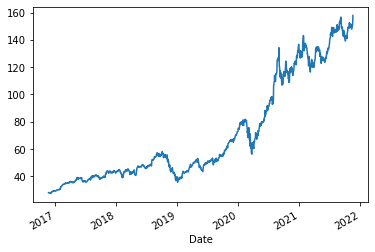

In [51]:
dfs['Close'].plot()

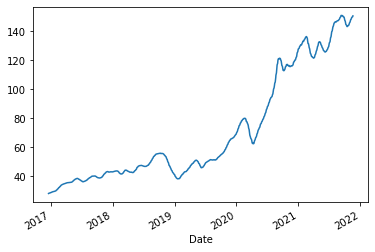

In [52]:
dfs['Close'].rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

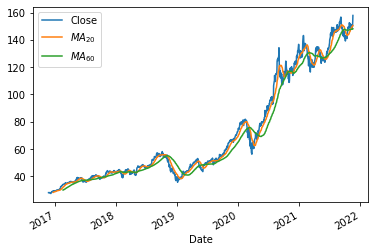

In [53]:
dfs.Close.plot(legend=True)
dfs.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
dfs.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [54]:
dft = dfs.tail(300)
close = dft['Close'].values

len(close)

300

In [55]:
x = close[:-1]
len(x)

299

In [56]:
y = close[1:]
len(y)

299

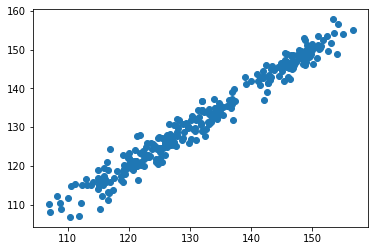

In [58]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [59]:
mydata = np.random.randn(4,3)

In [60]:
mydata

array([[-0.63322272,  0.42879724, -0.92222476],
       [ 0.72614542, -0.58796969,  1.5470906 ],
       [ 0.40129343, -0.27563617, -1.0835948 ],
       [-0.03291254, -0.94894568,  0.67165993]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [61]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [62]:
df2

,A,B,C
0,-0.633223,0.428797,-0.922225
1,0.726145,-0.587970,1.547091
2,0.401293,-0.275636,-1.083595
3,-0.032913,-0.948946,0.671660


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [63]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [64]:
df3

,A,B,C
0,0.037292,-0.585488,-1.765552
1,-0.552874,0.696266,-1.397760
2,1.127602,0.060420,-1.195303


In [66]:
df23 = pd.concat([df2, df3])

In [67]:
df23

,A,B,C
0,-0.633223,0.428797,-0.922225
1,0.726145,-0.587970,1.547091
2,0.401293,-0.275636,-1.083595
3,-0.032913,-0.948946,0.671660
0,0.037292,-0.585488,-1.765552
1,-0.552874,0.696266,-1.397760
2,1.127602,0.060420,-1.195303


前面我們弄得亂七八糟的 index 重設一下。

In [68]:
df23 = df23.reset_index(drop = True)

In [69]:
df23

,A,B,C
0,-0.633223,0.428797,-0.922225
1,0.726145,-0.587970,1.547091
2,0.401293,-0.275636,-1.083595
3,-0.032913,-0.948946,0.671660
4,0.037292,-0.585488,-1.765552
5,-0.552874,0.696266,-1.397760
6,1.127602,0.060420,-1.195303


#### 横向的貼

In [70]:
df23_1 = pd.concat([df2, df3], axis = 1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [71]:
df23_1

,A,B,C,A,B,C
0,-0.633223,0.428797,-0.922225,0.037292,-0.585488,-1.765552
1,0.726145,-0.587970,1.547091,-0.552874,0.696266,-1.397760
2,0.401293,-0.275636,-1.083595,1.127602,0.060420,-1.195303
3,-0.032913,-0.948946,0.671660,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [75]:
df_name = pd.read_csv('C:\\Users\\AndyLiu\\Downloads\\Unit02\\data\\names.csv', names = ['姓名'])

In [76]:
df_name

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [77]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [78]:
df_grades

,國文,英文,數學,社會,自然
0,12,7,9,12,14
1,10,10,9,15,8
2,12,11,14,10,12
3,12,9,11,9,14
4,15,12,7,7,6
...,...,...,...,...,...
95,14,10,8,14,15
96,10,10,7,15,12
97,12,15,9,13,7
98,12,9,10,10,6


In [80]:
df_final = pd.concat([df_name, df_grades], axis = 1)
df_final

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,12,7,9,12,14
1,王紹尹,10,10,9,15,8
2,黃季坤,12,11,14,10,12
3,許正書,12,9,11,9,14
4,張鈞蓮,15,12,7,7,6
...,...,...,...,...,...,...
95,陳君生,14,10,8,14,15
96,曾桂甫,10,10,7,15,12
97,林欣怡,12,15,9,13,7
98,林佳霖,12,9,10,10,6
